<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5B%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%A7%88%EC%9D%B4%EB%8B%9D%5D_%E1%84%8B%E1%85%AF%E1%84%83%E1%85%B3_%E1%84%8F%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A1%E1%84%8B%E1%85%AE%E1%84%83%E1%85%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

텍스터 빈도를 워드클라우드로 시각화

# 데이터 로드



In [1]:
# txt 파일을 pandas의 형태로 변환하지 않고
# 직접적으로 load
# 과정에서 0 혹은 1 부분은 제거

file_path = 'yelp_labelled.txt'

with open(file_path, 'r', encoding='utf-8') as file :
    data = [line.split('\t')[0] for line in file]

print(data[:5])

['Wow... Loved this place.', 'Crust is not good.', 'Not tasty and the texture was just nasty.', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', 'The selection on the menu was great and so were the prices.']


# 전처리 (Tokenize, Stop Words, Stemming + alpha)

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocessing(text) :
    # 소문자 변환
    text = text.lower()
    # 비 단어적 요소 제거
    text = re.sub(r'\W', ' ', text)
    # Tokeinize (띄어쓰기 단위로)
    text = text.split()
    # Stop words 제거
    text = [t for t in text if t not in stop_words]
    # 어간 추출
    text = [stemmer.stem(word) for word in text]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
for d in data[:5] :
    print(f'원래 문장 : {d}')
    print(f'전처리 후 문장 : {preprocessing(d)}')
    print()

원래 문장 : Wow... Loved this place.
전처리 후 문장 : ['wow', 'love', 'place']

원래 문장 : Crust is not good.
전처리 후 문장 : ['crust', 'good']

원래 문장 : Not tasty and the texture was just nasty.
전처리 후 문장 : ['tasti', 'textur', 'nasti']

원래 문장 : Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
전처리 후 문장 : ['stop', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'love']

원래 문장 : The selection on the menu was great and so were the prices.
전처리 후 문장 : ['select', 'menu', 'great', 'price']



In [4]:
# 모든 토큰을 하나의 리스트에 넣어줌
preproc_data = [' '.join(preprocessing(d)) for d in data]
print(preproc_data[:5])

combined_text = ' '.join(preproc_data)
print(combined_text[:100])

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price']
wow love place crust good tasti textur nasti stop late may bank holiday rick steve recommend love se


# 워드 클라우드 생성

In [7]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, #이미지 크기
                      background_color='white', #배경색
                      min_font_size=10, #최소 글자 크기
                      max_font_size=200).generate(combined_text)

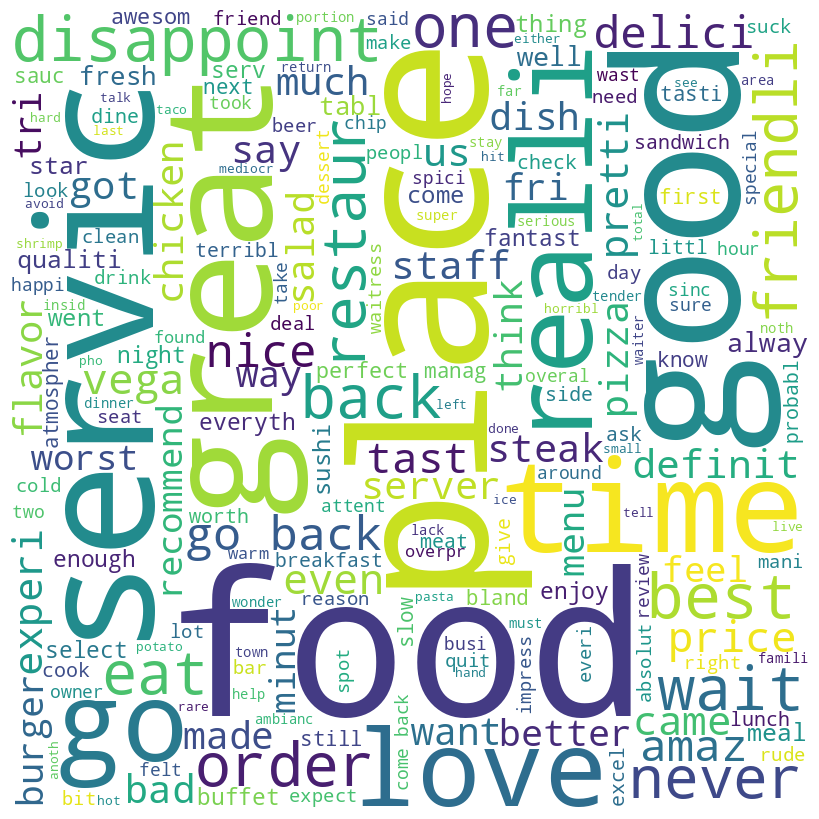

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

음식, 서비스 , 장소, great, love..